In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer   #term frequency inverse document frequency
from sklearn.linear_model import LogisticRegression
import joblib 
import pickle
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("mail_data.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
data=df.where((pd.notnull(df))," ")

In [4]:
data.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
data.shape

(5572, 2)

In [7]:
data.loc[data["Category"]=="spam","Category",]=0
data.loc[data["Category"]=="ham","Category",]=1
# alternative : data["Category"] = data["Category"].map({"spam": 0, "ham": 1})

In [8]:
x=data["Message"]
y=data["Category"]
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [9]:
print(y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)       

In [11]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(5572,)
(4457,)
(1115,)


In [12]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(5572,)
(4457,)
(1115,)


In [13]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words="english",lowercase=True)

x_train_features=feature_extraction.fit_transform(x_train)
x_test_features=feature_extraction.transform(x_test)

y_train=y_train.astype("int")
y_test=y_test.astype("int")

In [14]:

joblib.dump(feature_extraction, 'tfidf_vectorizer.pkl')
pickle.dump(feature_extraction,open("spam_mail_detect1.pkl","wb"))


In [15]:
print(x_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [16]:
print(x_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34775 stored elements and shape (4457, 7431)>
  Coords	Values
  (0, 2329)	0.38783870336935383
  (0, 3811)	0.34780165336891333
  (0, 2224)	0.413103377943378
  (0, 4456)	0.4168658090846482
  (0, 5413)	0.6198254967574347
  (1, 3811)	0.17419952275504033
  (1, 3046)	0.2503712792613518
  (1, 1991)	0.33036995955537024
  (1, 2956)	0.33036995955537024
  (1, 2758)	0.3226407885943799
  (1, 1839)	0.2784903590561455
  (1, 918)	0.22871581159877646
  (1, 2746)	0.3398297002864083
  (1, 2957)	0.3398297002864083
  (1, 3325)	0.31610586766078863
  (1, 3185)	0.29694482957694585
  (1, 4080)	0.18880584110891163
  (2, 6601)	0.6056811524587518
  (2, 2404)	0.45287711070606745
  (2, 3156)	0.4107239318312698
  (2, 407)	0.509272536051008
  (3, 7414)	0.8100020912469564
  (3, 2870)	0.5864269879324768
  (4, 2870)	0.41872147309323743
  (4, 487)	0.2899118421746198
  :	:
  (4454, 2855)	0.47210665083641806
  (4454, 2246)	0.47210665083641806
  (4455, 4456)	0.24

In [ ]:
model=LogisticRegression(max_iter=1000)

In [18]:
model.fit(x_train_features,y_train)

LogisticRegression(max_iter=1000)

In [19]:
prediction_on_training_data=model.predict(x_train_features)
accuracy_on_training_data=accuracy_score(y_train,prediction_on_training_data)

In [20]:
joblib.dump(model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [21]:
print("Accuracy of training data :",accuracy_on_training_data)

Accuracy of training data : 0.9676912721561588


In [22]:
prediction_on_test_data=model.predict(x_test_features)
accuracy_on_test_data=accuracy_score(y_test,prediction_on_test_data)

In [23]:
print("Accuracy of testing data:",accuracy_on_test_data)

Accuracy of testing data: 0.9668161434977578


In [24]:
cm = confusion_matrix(y_test, prediction_on_test_data)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[118  37]
 [  0 960]]


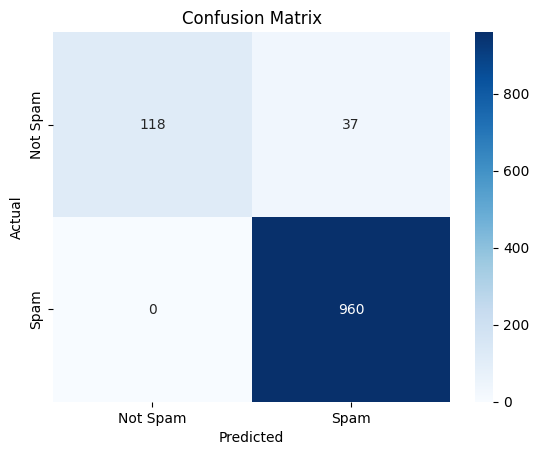

In [25]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [26]:
input_your_mail=[]
for i in range(1):
    x=input("Enter the mail:")
    input_your_mail.append(x)
    print(input_your_mail)

input_data_features=feature_extraction.transform(input_your_mail)

prediction=model.predict(input_data_features)
if(prediction[0]!=1):
    print("Spam Mail")
else:
    print("Ham Mail")

# SPAM : URGENT! You have won a 1 week FREE membership in our Â£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18
# HAM : Dear Customer,We are pleased to inform you that your order #12345 has been shipped. You can expect to receive your package within 5-7 business days.Thank you for shopping with us. 

['hi']
Ham Mail
